In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = '/content/drive/MyDrive/COURSEW/Rsrch/'

In [3]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from Modules.data_processing import split_data, get_statistics, preprocess_books, shorten_sessions

In [4]:
n_sessions = 20000
# sorted_events = sample_data('data', 'events.csv')
sorted_events = pd.read_csv(data_path + 'data/sorted_events.csv')
ch_sorted_events, itm2idx = shorten_sessions(sorted_events, n_sessions=n_sessions)
train_df, val_df, test_df = split_data(ch_sorted_events)
replay_buf, data_stats = get_statistics(ch_sorted_events, train_df)

unique: 33977 min: 0 max: 33976


In [5]:
data_stats

,state_size,item_num
0,10,33977


In [6]:
%pip install trfl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 kB 3.1 MB/s eta 0:00:00


In [7]:
from Modules.train import train, test

In [8]:
from Modules.misc import last_results, plot_validation

# DQN

In [9]:
arg_dict = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.001,
            'epoch' : 20,
            'batch_size' : 256,
            'neg' : 10,
            'discount' : 0.5
            }
results_dqn = []
losses_dqn = []
DQN_1, sess_DQN = train(data_stats, replay_buf, val_df, arg_dict=arg_dict, results=results_dqn, losses=losses_dqn)

Instructions for updating:
non-resource variables are not supported in the long term
/content/Modules/Model.py:85: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/content/Modules/SASRecModules.py:59: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None)
/content/Modules/SASRecModules.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  V = tf.compat.v1.layers.dense(keys, num_units, activation=N

#############################################################
total clicks: 10959, total purchase:435
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 0.200000
clicks hr ndcg @ 5 : 0.000091, 0.000039
purchase hr and ndcg @5 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 0.800000
clicks hr ndcg @ 10 : 0.000365, 0.000130
purchase hr and ndcg @10 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 0.800000
clicks hr ndcg @ 15 : 0.000365, 0.000130
purchase hr and ndcg @15 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 1.000000
clicks hr ndcg @ 20 : 0.000456, 0.000150
purchase hr and ndcg @20 : 0.000000, 0.000000
#############################################################
$$$$ STARTING EPOCH # 0 $$$$
the loss in 50th batch is: 4.720860
the loss in 100th batch is: 2.711722
the loss 

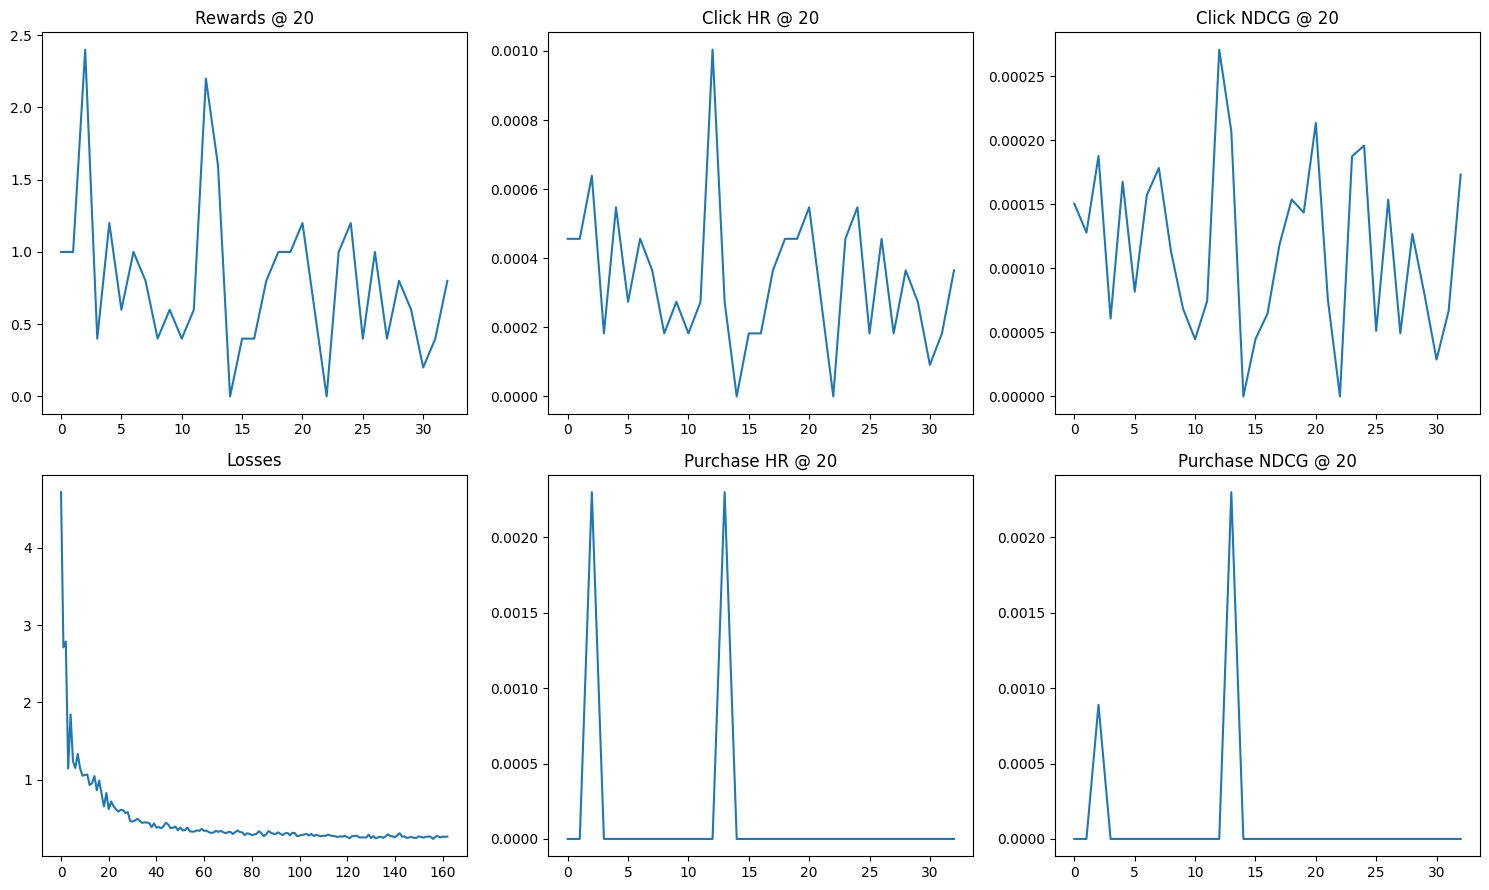

In [10]:
plot_validation(losses_dqn, results_dqn, at=20)

In [11]:
VAL_RESULTS_DQN = last_results(results_dqn)

In [12]:
test_results_DQN = []
test(sess_DQN, DQN_1, data_stats, test_df, test_results_DQN, data_dir=data_path + 'data/')

#############################################################
total clicks: 11075, total purchase:523
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 0.000000
clicks hr ndcg @ 5 : 0.000000, 0.000000
purchase hr and ndcg @5 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 1.000000
clicks hr ndcg @ 10 : 0.000000, 0.000000
purchase hr and ndcg @10 : 0.001912, 0.000681
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 1.000000
clicks hr ndcg @ 15 : 0.000000, 0.000000
purchase hr and ndcg @15 : 0.001912, 0.000681
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 1.200000
clicks hr ndcg @ 20 : 0.000090, 0.000021
purchase hr and ndcg @20 : 0.001912, 0.000681
#############################################################


# SNQN

In [13]:

arg_dict = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.005,
            'epoch' : 50,
            'batch_size' : 256,
            'neg' : 10,
            'discount' : 0.5
            }
results_snqn = []
losses_snqn = []
SNQN_1, sess_SNQN = train(data_stats, replay_buf, val_df, arg_dict=arg_dict, results=results_snqn, losses=losses_snqn, configuration='SNQN')

/content/Modules/Model.py:85: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/content/Modules/SASRecModules.py:59: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None)
/content/Modules/SASRecModules.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  V = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:96: UserWarning: `tf.layers.dropout` is deprec

#############################################################
total clicks: 10959, total purchase:435
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 0.600000
clicks hr ndcg @ 5 : 0.000274, 0.000188
purchase hr and ndcg @5 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 1.600000
clicks hr ndcg @ 10 : 0.000730, 0.000337
purchase hr and ndcg @10 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 2.000000
clicks hr ndcg @ 15 : 0.000912, 0.000385
purchase hr and ndcg @15 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 2.200000
clicks hr ndcg @ 20 : 0.001004, 0.000406
purchase hr and ndcg @20 : 0.000000, 0.000000
#############################################################
$$$$ STARTING EPOCH # 0 $$$$
the loss in 50th batch is: 13.928270
the loss in 100th batch is: 13.311848
the los

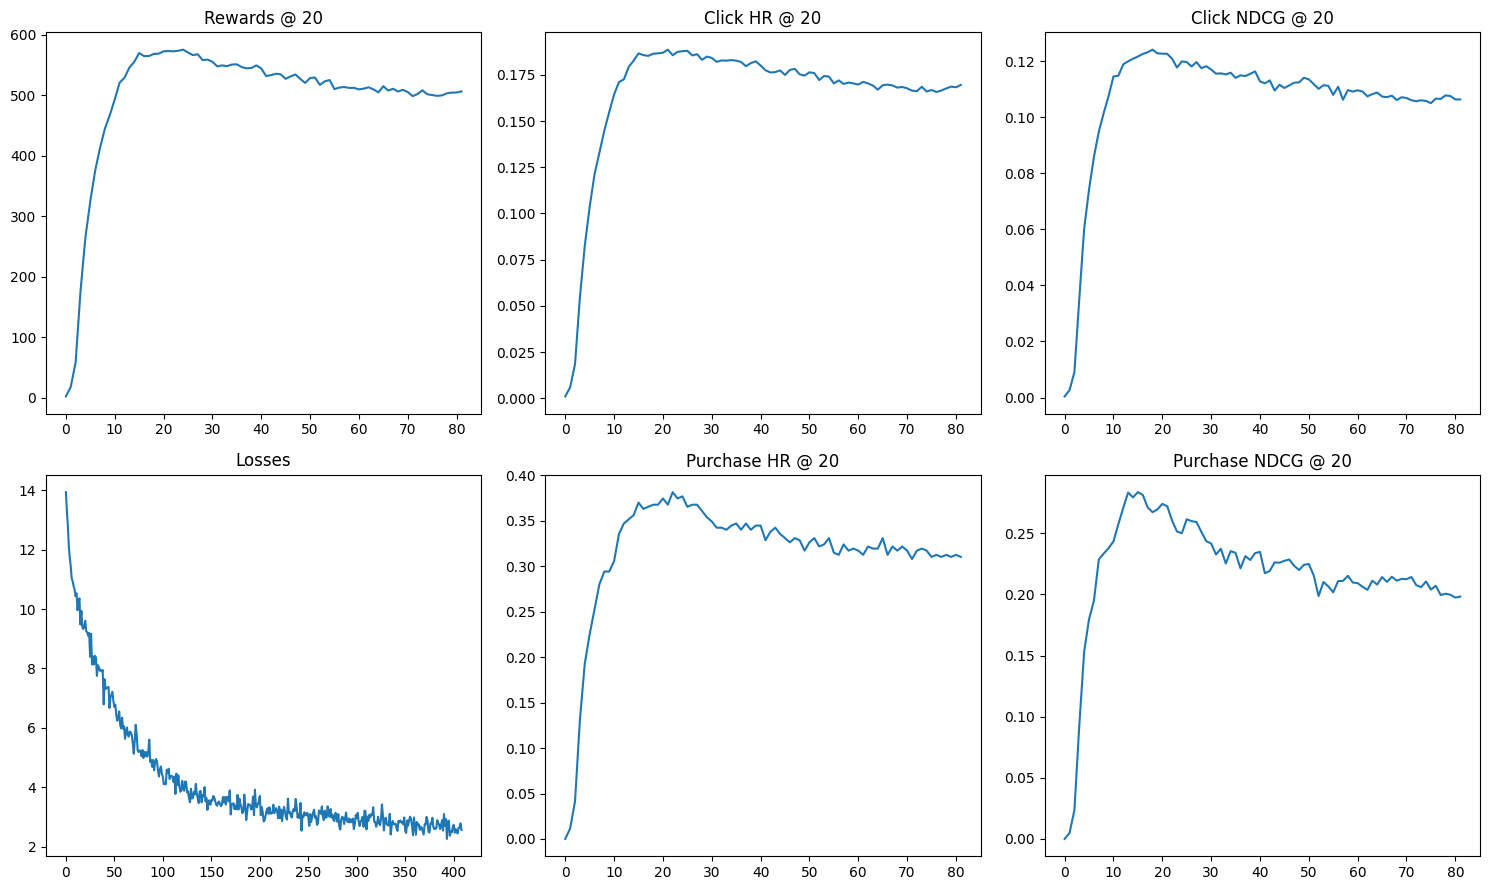

In [14]:
plot_validation(losses_snqn, results_snqn)

In [15]:
VAL_RESULTS_SNQN = last_results(results_snqn)

In [19]:
test_results_SNQN = []
test(sess_SNQN, SNQN_1, data_stats, test_df, test_results_SNQN, data_dir='/content/drive/MyDrive/COURSEW/Rsrch/data')

#############################################################
total clicks: 11075, total purchase:523
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 412.400000
clicks hr ndcg @ 5 : 0.132460, 0.095610
purchase hr and ndcg @5 : 0.227533, 0.170292
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 496.200000
clicks hr ndcg @ 10 : 0.157652, 0.103745
purchase hr and ndcg @10 : 0.281071, 0.187855
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 526.400000
clicks hr ndcg @ 15 : 0.168126, 0.106513
purchase hr and ndcg @15 : 0.294455, 0.191379
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 548.000000
clicks hr ndcg @ 20 : 0.175621, 0.108282
purchase hr and ndcg @20 : 0.304015, 0.193610
#############################################################


# SA2C

In [ ]:
# from Modules.data_processing import create_pop_dict

# create_pop_dict()

In [21]:
arg_dict = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.005,
            'lr2' : 0.001,
            'epoch' : 50,
            'batch_size' : 256,
            'neg' : 10,
            'discount' : 0.5,
            'smooth' : 0.0,
            'clip' : 0.0
            }
results_sa2c = []
losses_sa2c = []
SA2C_1, sess_sa2c  = train(data_stats, replay_buf, val_df, arg_dict=arg_dict, results=results_sa2c, losses=losses_sa2c, configuration='SA2C', data_dir='/content/drive/MyDrive/COURSEW/Rsrch/data')


/content/Modules/Model.py:85: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/content/Modules/SASRecModules.py:59: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None)
/content/Modules/SASRecModules.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  V = tf.compat.v1.layers.dense(keys, num_units, activation=None)
/content/Modules/SASRecModules.py:96: UserWarning: `tf.layers.dropout` is deprec

#############################################################
total clicks: 10959, total purchase:435
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 1.200000
clicks hr ndcg @ 5 : 0.000091, 0.000058
purchase hr and ndcg @5 : 0.002299, 0.000990
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 3.200000
clicks hr ndcg @ 10 : 0.000547, 0.000199
purchase hr and ndcg @10 : 0.004598, 0.001715
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 3.600000
clicks hr ndcg @ 15 : 0.000730, 0.000248
purchase hr and ndcg @15 : 0.004598, 0.001715
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 4.000000
clicks hr ndcg @ 20 : 0.000912, 0.000290
purchase hr and ndcg @20 : 0.004598, 0.001715
off-line corrected evaluation (click_ng,purchase_ng) @10: 0.000295, 0.001015
#############################################################
$$$$ STARTING EPOCH # 0 $$$$
the l

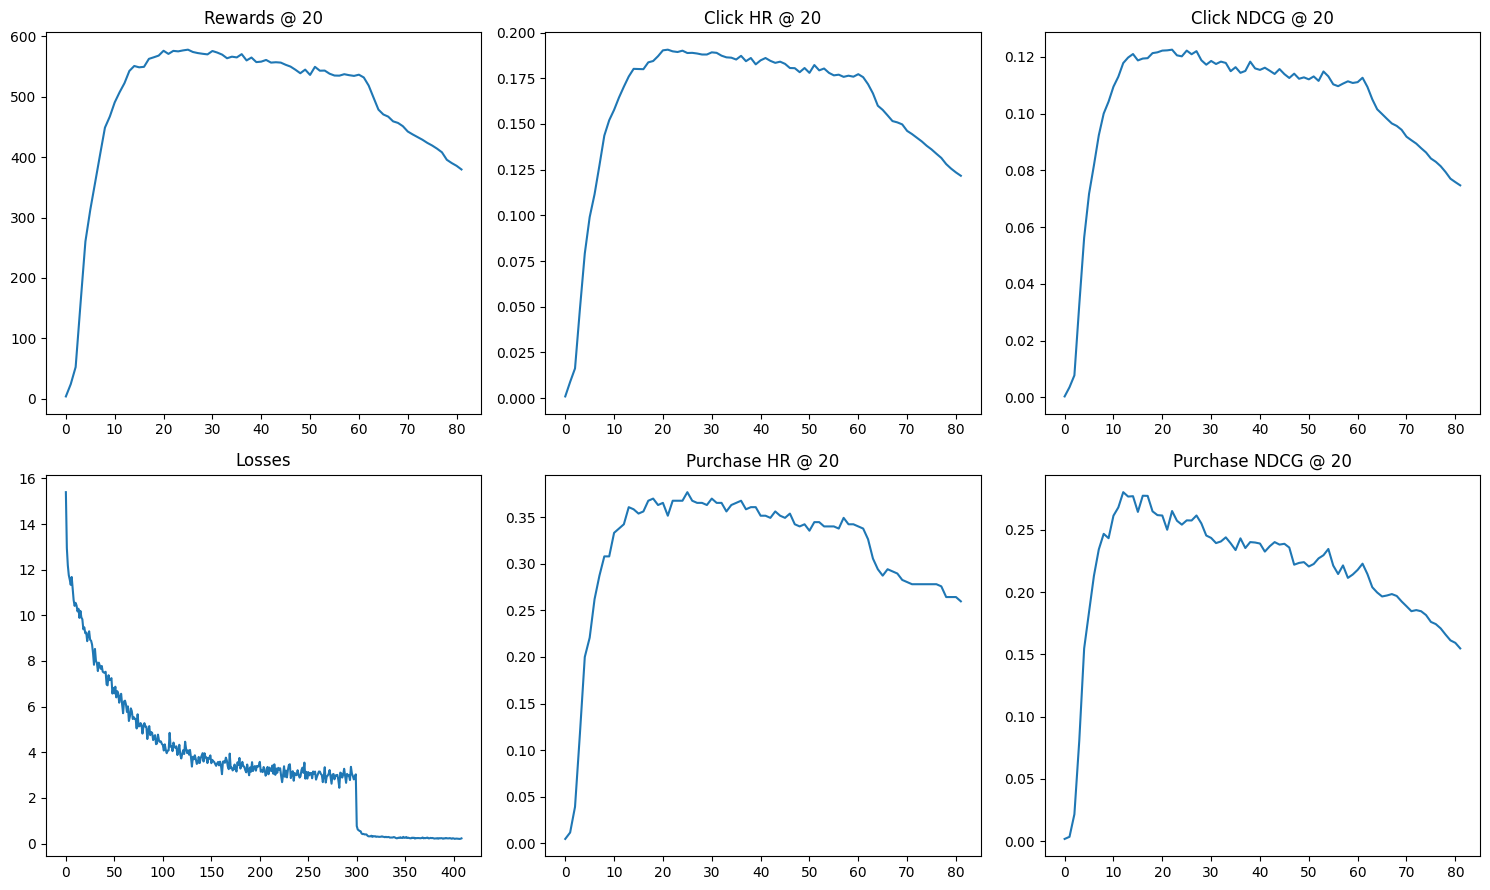

In [22]:
plot_validation(losses_sa2c, results_sa2c)

In [23]:
VAL_RESULTS_SA2C = last_results(results_sa2c)

In [24]:
test_results_SA2C = []
test(sess_sa2c, SA2C_1, data_stats, test_df, test_results_SA2C, data_dir='/content/drive/MyDrive/COURSEW/Rsrch/data')

#############################################################
total clicks: 11075, total purchase:523
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 234.400000
clicks hr ndcg @ 5 : 0.071512, 0.051666
purchase hr and ndcg @5 : 0.145315, 0.105309
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 296.400000
clicks hr ndcg @ 10 : 0.090926, 0.057872
purchase hr and ndcg @10 : 0.181644, 0.116873
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 345.600000
clicks hr ndcg @ 15 : 0.109977, 0.062838
purchase hr and ndcg @15 : 0.195029, 0.120455
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 370.400000
clicks hr ndcg @ 20 : 0.119368, 0.065060
purchase hr and ndcg @20 : 0.202677, 0.122252
off-line corrected evaluation (click_ng,purchase_ng) @10: 0.058505, 0.118250
#############################################################


## Comparison

### Validation last step

In [25]:
print('DQN: \n', VAL_RESULTS_DQN)

DQN: 
 Rewards:
 @5 : 0.2 @10 : 0.6000000000000001 @15 : 0.6000000000000001 @20 : 0.8

Click HR:
 @5 : 9.124920156948626e-05 @10 : 0.0002737476047084588 @15 : 0.0002737476047084588 @20 : 0.00036499680627794504

Click NDCG:
 @5 : 9.124920156948626e-05 @10 : 0.00015253874111632 @15 : 0.00015253874111632 @20 : 0.00017331346953104333

Purchase HR:
 @5 : 0.0 @10 : 0.0 @15 : 0.0 @20 : 0.0

Purchase NDCG:
 @5 : 0.0 @10 : 0.0 @15 : 0.0 @20 : 0.0


In [26]:
print('SNQN: \n', VAL_RESULTS_SNQN)

SNQN: 
 Rewards:
 @5 : 378.39999999999077 @10 : 444.3999999999882 @15 : 487.59999999998627 @20 : 506.59999999998547

Click HR:
 @5 : 0.12701888858472488 @10 : 0.14846245095355415 @15 : 0.16269732639839402 @20 : 0.16954101651610548

Click NDCG:
 @5 : 0.09397268542663163 @10 : 0.10094524867445911 @15 : 0.10471732666566387 @20 : 0.10632978781864567

Purchase HR:
 @5 : 0.22988505747126436 @10 : 0.2735632183908046 @15 : 0.30114942528735633 @20 : 0.3103448275862069

Purchase NDCG:
 @5 : 0.17435730943822778 @10 : 0.18880964788516913 @15 : 0.19607809271065885 @20 : 0.19828611975425503


In [27]:
print('SA2C: \n', VAL_RESULTS_SA2C)

SA2C: 
 Rewards:
 @5 : 262.1999999999956 @10 : 322.99999999999335 @15 : 355.5999999999921 @20 : 379.59999999999116

Click HR:
 @5 : 0.08358426863764942 @10 : 0.10311159777351948 @15 : 0.11342275755087143 @20 : 0.1216351856921252

Click NDCG:
 @5 : 0.0636376351991733 @10 : 0.07002487565112503 @15 : 0.07276003456012367 @20 : 0.07470535262805325

Purchase HR:
 @5 : 0.18160919540229886 @10 : 0.22298850574712645 @15 : 0.24597701149425288 @20 : 0.2597701149425287

Purchase NDCG:
 @5 : 0.1317740473364213 @10 : 0.14545184439554146 @15 : 0.1515313454974066 @20 : 0.15483443343990405


### Test

In [28]:
print("DQN:", test_results_DQN)

DQN: [{5: {'reward': 0, 'click hr': 0.0, 'click ndcg': 0.0, 'purchase hr': 0.0, 'purchase ndcg': 0.0}, 10: {'reward': 1, 'click hr': 0.0, 'click ndcg': 0.0, 'purchase hr': 0.0019120458891013384, 'purchase ndcg': 0.0006810844877782451}, 15: {'reward': 1, 'click hr': 0.0, 'click ndcg': 0.0, 'purchase hr': 0.0019120458891013384, 'purchase ndcg': 0.0006810844877782451}, 20: {'reward': 1.2, 'click hr': 9.029345372460496e-05, 'click ndcg': 2.055713306518763e-05, 'purchase hr': 0.0019120458891013384, 'purchase ndcg': 0.0006810844877782451}}]


In [29]:
print("SNQN:", test_results_SNQN)

SNQN: [{5: {'reward': 412.3999999999887, 'click hr': 0.13246049661399548, 'click ndcg': 0.09560989902645316, 'purchase hr': 0.22753346080305928, 'purchase ndcg': 0.17029249992782985}, 10: {'reward': 496.1999999999859, 'click hr': 0.15765237020316028, 'click ndcg': 0.1037453399789043, 'purchase hr': 0.28107074569789675, 'purchase ndcg': 0.18785534342891608}, 15: {'reward': 526.3999999999887, 'click hr': 0.16812641083521446, 'click ndcg': 0.10651328342582986, 'purchase hr': 0.2944550669216061, 'purchase ndcg': 0.19137941174631543}, 20: {'reward': 547.9999999999917, 'click hr': 0.17562076749435665, 'click ndcg': 0.10828196351611878, 'purchase hr': 0.30401529636711283, 'purchase ndcg': 0.1936103451421826}}]


In [30]:
print("SA2C:", test_results_SA2C)

SA2C: [{5: {'reward': 234.39999999999677, 'click hr': 0.07151241534988713, 'click ndcg': 0.05166551515753504, 'purchase hr': 0.14531548757170173, 'purchase ndcg': 0.10530859362743698}, 10: {'reward': 296.39999999999424, 'click hr': 0.0909255079006772, 'click ndcg': 0.057872044777833295, 'purchase hr': 0.18164435946462715, 'purchase ndcg': 0.11687288431275242, 'off-line click ndcg': 0.05850477050602408, 'off-line purchase ndcg': 0.11824969567994635}, 15: {'reward': 345.5999999999918, 'click hr': 0.10997742663656884, 'click ndcg': 0.06283769219218462, 'purchase hr': 0.1950286806883365, 'purchase ndcg': 0.12045541064206654}, 20: {'reward': 370.39999999999065, 'click hr': 0.11936794582392776, 'click ndcg': 0.06505978617433192, 'purchase hr': 0.20267686424474188, 'purchase ndcg': 0.12225235807243033}}]


# Dataset with books

In [ ]:
books_df, rated_books_df = preprocess_books('books_dataset/interactions.csv')
books_df = shorten_sessions(books_df, n_sessions=n_sessions)
books_train_df, books_val_df, books_test_df = split_data(books_df)
books_replay_buf, books_data_stats = get_statistics(books_df, books_train_df)
books_data_stats

In [ ]:
import matplotlib.pyplot as plt

### DQN

In [ ]:
arg_dict_books = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.001,
            'epoch' : 30,
            'batch_size' : 256,
            'neg' : 10,
            'discount' : 0.5
            }
results_books = []
losses_books = []
QN_1_books, QN_2_books = train(books_data_stats, books_replay_buf, books_val_df, arg_dict=arg_dict_books, results=results_books, losses=losses_books, configuration='DQN')

In [ ]:
plt.plot(losses_books)
plt.title('DQN books Losses')
plt.show()

In [ ]:
_ = last_results(results_books, print_out=True)

### SNQN

In [ ]:
arg_dict_books = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.005,
            'epoch' : 30,
            'batch_size' : 256,
            'neg' : 10,
            'discount' : 0.5
            }
results_books = []
losses_books = []
QN_1_books, QN_2_books = train(books_data_stats, books_replay_buf, books_val_df, arg_dict=arg_dict_books, results=results_books, losses=losses_books, configuration='SNQN')
plt.plot(losses_books)
plt.title('SNQN books Losses')
plt.show()
_ = last_results(results_books, print_out=True)


### SA2C

In [ ]:
arg_dict_books = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.005,
            'lr2' : 0.001,
            'epoch' : 30,
            'batch_size' : 256,
            'neg' : 10,
            'discount' : 0.5,
            'smooth' : 0.0,
            'clip' : 0.0
            }
results_books = []
losses_books = []
QN_1_books, QN_2_books = train(books_data_stats, books_replay_buf, books_val_df, arg_dict=arg_dict_books, results=results_books, losses=losses_books, configuration='SA2C')
plt.plot(losses_books)
plt.title('SA2C books Losses')
plt.show()
_ = last_results(results_books, print_out=True)
